# Read data

In [2]:
import sys
from pathlib import Path
root_proj = Path("/Users/yk/Documents/Projects/Pre-PhD")

if str(root_proj/"src") not in sys.path:
    sys.path.append(str(root_proj/"src"))

In [3]:
import pandas as pd
from data_proc import convert_for_EV

year = 2023

chargelogs = pd.read_excel(root_proj / "DATA_SYSTEM_LIDL" / "Raw_chargelogs" / f"Chargelogs {year}.xlsx")
# convert the data frame for each hour
converted_df = convert_for_EV(chargelogs, bin=60)
converted_df.sample(20)

,Time,LFR3591EVCP01,LFR3591EVCP02,LFR3591EVCP03,LFR3591EVCP04,LFR3591EVCP05,Total
5040,2023-07-30 00:00:00,0.000000,0.000000,0.000000,0.251006,0.000000,0.251006
4667,2023-07-14 11:00:00,3.734921,0.000000,0.000000,0.000000,0.000000,3.734921
3430,2023-05-23 22:00:00,3.585603,0.000000,0.000000,0.947226,7.586199,12.119028
8425,2023-12-18 01:00:00,0.813899,0.000000,0.000000,0.000000,0.000000,0.813899
4791,2023-07-19 15:00:00,3.902860,5.738855,0.000000,0.000000,6.504573,16.146288
2522,2023-04-16 02:00:00,0.000000,0.000000,0.000000,0.000000,2.412160,2.412160
5440,2023-08-15 16:00:00,0.000000,0.000000,2.709862,0.000000,3.167470,5.877332
7860,2023-11-24 12:00:00,19.472892,2.812611,5.539680,0.000000,0.000000,27.825183
2908,2023-05-02 04:00:00,0.000000,0.000000,0.000000,2.248145,6.197742,8.445887
536,2023-01-23 08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
# calculate month, week and hour
converted_df['hour'] = converted_df['Time'].dt.hour
converted_df['day'] = converted_df['Time'].dt.day
converted_df['week'] = converted_df['Time'].dt.dayofweek
converted_df['is_weekend'] = (converted_df['Time'].dt.dayofweek >= 5).astype(int)
converted_df['month'] = converted_df['Time'].dt.month

In [16]:
converted_df

,Time,LFR3591EVCP01,LFR3591EVCP02,LFR3591EVCP03,LFR3591EVCP04,LFR3591EVCP05,Total,hour,day,week,month,is_weekend
0,2023-01-01 00:00:00,0.0,0.0,0.0,0.133589,0.0,0.133589,0,1,6,1,1
1,2023-01-01 01:00:00,0.0,0.0,0.0,1.687435,0.0,1.687435,1,1,6,1,1
2,2023-01-01 02:00:00,0.0,0.0,0.0,1.687435,0.0,1.687435,2,1,6,1,1
3,2023-01-01 03:00:00,0.0,0.0,0.0,1.687435,0.0,1.687435,3,1,6,1,1
4,2023-01-01 04:00:00,0.0,0.0,0.0,1.687435,0.0,1.687435,4,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,0.0,0.0,0.0,0.000000,0.0,0.000000,19,31,6,12,1
8756,2023-12-31 20:00:00,0.0,0.0,0.0,0.000000,0.0,0.000000,20,31,6,12,1
8757,2023-12-31 21:00:00,0.0,0.0,0.0,0.000000,0.0,0.000000,21,31,6,12,1
8758,2023-12-31 22:00:00,0.0,0.0,0.0,0.000000,0.0,0.000000,22,31,6,12,1


## Splite train and test

In [4]:
step = (60/15)*24*30*3 # three months
step = int(step)
df_train = converted_df.iloc[:-step]
df_test = converted_df.iloc[-step:]

## Plot

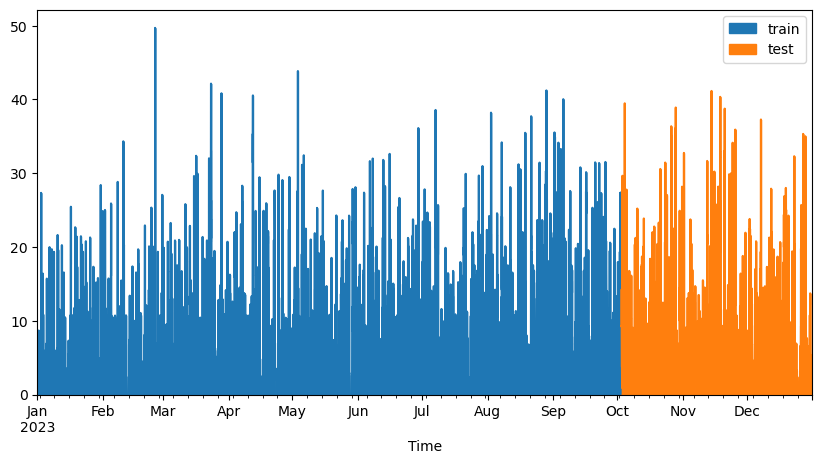

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
df_train.plot(ax=ax, label='train', x='Time', y='Total', kind='area')
df_test.plot(ax=ax, label='test', x='Time', y='Total', kind='area')
ax.legend()

plt.show()


# Training

In [6]:
from skforecast.recursive import ForecasterRecursive
from skforecast.preprocessing import RollingFeatures
from sklearn.ensemble import RandomForestRegressor

forecaster = ForecasterRecursive(
    regressor = RandomForestRegressor(random_state=42, verbose=-1),
    lags = int((60/15)*24*7), # use previous one week
    window_features = RollingFeatures(stats=['mean'], window_sizes=int((60/15)*24))
)

/var/folders/db/x13d_f8d3ws635w9r7q_xtrw0000gn/T/ipykernel_70585/1103748553.py:5: FutureWarning: The `regressor` argument is deprecated and will be removed in a future version. Please use `estimator` instead.
  forecaster = ForecasterRecursive(


In [7]:
type(forecaster.window_features[0])

skforecast.preprocessing.preprocessing.RollingFeatures

In [8]:
import joblib as jb
import json

output_dir = root_proj / "checkpoints" / "point03"

if not (output_dir / "log.json").is_file(): # first train
    output_dir.mkdir(parents=True, exist_ok=True)
    # training
    forecaster.fit(y=df_train['Total'], store_in_sample_residuals=True)
    # residuals = forecaster.in_sample_residuals  # 查看训练残差
    # save model
    jb.dump(forecaster, output_dir/"model.joblib")
    # log
    log = {
        "metadata": {
            "description": "recursive random forest regresion",
            "lags": int((60/15)*24*7),
            "window_features": {
                "type": "rolling",
                "stats": ["mean"],
                "window_size": int((60/15)*24)
            },
            "freq": "15min"
        },
        # "residuals": forecaster.in_sample_residuals
    }
    # save log
    with open(output_dir/"log.json", "w") as f:
        json.dump(log, f, indent=2)
    print("End of training")
else:
    # 加载模型 | load model
    forecaster = jb.load(output_dir/"model.joblib")
    # load log
    with open(output_dir/"log.json", "r") as f:
        log = json.load(f)
    print("Loaded")

Loaded


# Test and Display

In [9]:
yhat_test = forecaster.predict(steps=len(df_test))

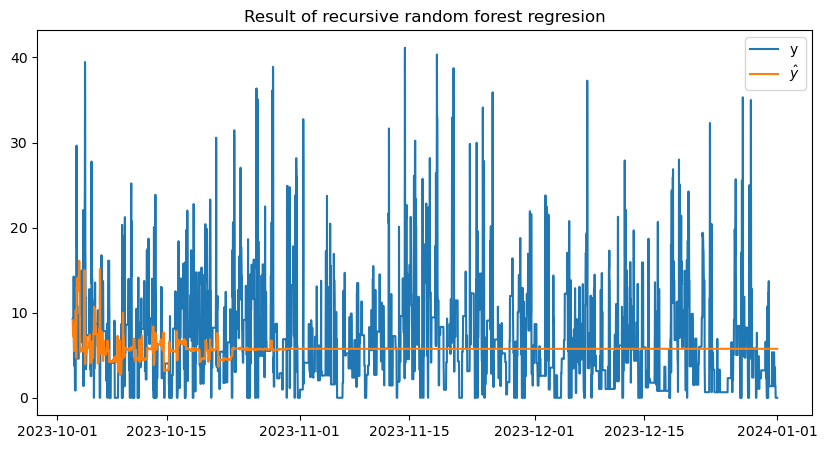

In [14]:
# Save and display the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Result of recursive random forest regresion")
ax.plot(df_test['Time'], df_test['Total'], label='y')
ax.plot(df_test['Time'], yhat_test, label=r'$\hat{y}$')
ax.legend()
# fig.autofmt_xdate() # for rotation
fig.savefig(output_dir / "prediction_test.png", dpi=300, bbox_inches='tight')
plt.show()

## Display just for fews

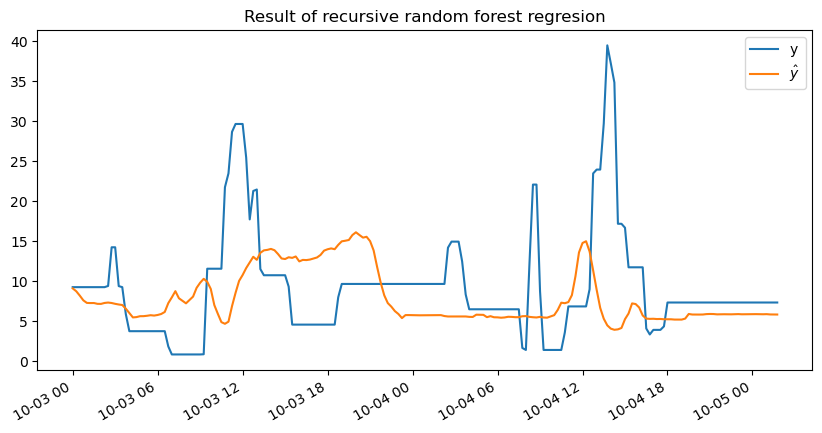

In [15]:
steps = 200

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Result of recursive random forest regresion")
ax.plot(df_test['Time'][:steps], df_test['Total'][:steps], label='y')
ax.plot(df_test['Time'][:steps], yhat_test[:steps], label=r'$\hat{y}$')
ax.legend()
fig.autofmt_xdate() # for rotation
plt.show()